# The Sparks Foundation - Data Science & Business Analytics Internship

## Task - 1 Prediction using Supervised ML
### Simple Linear Regression
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author - Bhakti Nikam

## Batch - December 2021

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
# Reading the given dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# using dataframe.shape to get a tuple representing the dimensionality of the DataFrame (Rows,Columns)
print (data.shape)

(25, 2)


In [4]:
# using dataframe.describe to get the statistical summary of the DataFrame
print (data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [5]:
# using dataframe.info to get a concise summary of the DataFrame
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [6]:
# checking the presence of missing values in the datafarme
data.isnull().values.any()

False

There are no missing values so we do not need to clean the data.


Let's visualize the dataset by plotting a 2-D graph to check if there is any relationship between the data.

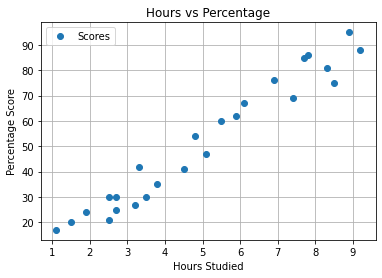

In [7]:
# visualizing the dataframe using a scatterplot
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid (True)
plt.show()

From the graph above, we can clearly see that number of hours studied are positively correlated with percentage of score.

### Preparing the Data

In [8]:
# dividing the dataset into dependent(input) and independent(output) variables
x = data['Hours']     #Input
y = data['Scores']    #Output

In [9]:
print ("(Index)(Value of x) \n")
print (x)
print ("(Index)(Value of y) \n")
print (y)

(Index)(Value of x) 

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64
(Index)(Value of y) 

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [10]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
lm =LinearRegression()  
model=lm.fit(X_train, Y_train) 

In [13]:
print("Intercept:                               ", model.intercept_)
print("Coefficient of the independent variable: ",model.coef_)
print("\nTraining complete.")

Intercept:                                2.0181600414346974
Coefficient of the independent variable:  [9.91065648]

Training complete.


In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, Y_train)
print("Data is Trained")

Data is Trained


In [15]:
#Regression Line
line = model.intercept_ + model.coef_*x


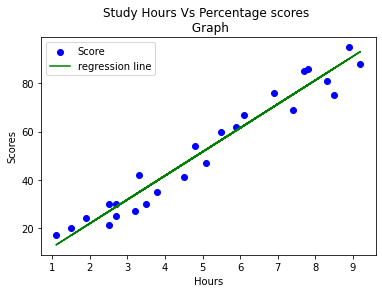

In [16]:
line = LR.coef_ * X+LR.intercept_

plt.scatter(X,Y,color='blue', label = 'Score')
plt.title("Study Hours Vs Percentage scores \n Graph")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot(X,line,color='green', label = 'regression line')
plt.legend()
plt.show()

### Predicting Dataset

In [17]:
Y_predicted = model.predict(X_test)

###### Comparing the actual and Predicted Scores

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predicted})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Solving the task using model
#### What will be the predicted score of a student if he/she studies for 9.25 hrs/day?

In [19]:
task = 9.25 #hrs/day
predicted_score = model.predict([[task]])
print("No. of Hours Studied :      ", task)
print("Predicted Percentage Score :",predicted_score[0])

No. of Hours Studied :       9.25
Predicted Percentage Score : 93.69173248737535


#### Now we will check the R squared value to check the accuracy of our model

In [20]:
from sklearn.metrics import r2_score
Y_true = [20,27,69,30,62]
Y_predicted = [16.9,33.8,75.4,26.8,60.5]
r2_score(Y_true,Y_predicted)

0.9448314153038563

### The R Squared value is 0.944. It can be referred that 94.4% of the changeability of the dependent output attribute can be explained by the model which means it can give 94.4% accurate results!

##### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [21]:
# Evaluating absolute errors
from sklearn import metrics 
print("Mean Absolute Error :", metrics.mean_absolute_error(Y_test, Y_predicted))
print("Mean Squared Error :", metrics.mean_squared_error(Y_test, Y_predicted))

Mean Absolute Error : 4.200000000000001
Mean Squared Error : 21.860000000000007


## Conclusion
#### 1) Our model predicts that if a student studies for 9.25 hrs/day then he/she will score 93.69%.
#### 2) The accuracy of our model is 94.4%.